In [1]:
import wrangle as w
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # You can choose a different model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import xgboost
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nltk.sentiment
from scipy import stats

# Capstone Project


****In this project, we aim to collect Glassdoor ratings and pros and cons for various companies and develop classification and regression models to predict Glassdoor star scores. The primary goal is to identify quality improvements in workplaces and enhance the representation of companies in the public eye.****

## Project Goals
1. **Create a Robust and Diverse Dataset:**
   Collect a dataset comprising a minimum of 100 of the most forked repositories from GitHub, covering a wide range of domains and project types. This dataset will serve as the foundation for the language analysis and should include repositories of varying sizes and purposes to ensure a representative sample.

2. **Accurate Language Detection and Comparison:**
   Develop a language detection mechanism using NLP techniques to accurately identify and extract JavaScript and Python code snippets from the scraped README content. Calculate the frequency of these code snippets within the dataset and generate a comparative analysis of the prevalence of JavaScript and Python across the repositories.

3. **Provide Insights and Visualizations:**
   Produce meaningful insights and visualizations that effectively communicate the language usage trends between JavaScript and Python. Create a variety of visual representations, such as bar charts, heatmaps, and language distribution plots, to offer a clear and comprehensive view of how these two languages are utilized within the top 100 GitHub repositories.


## Wrangle
- This dataset was scraped from glassdoor.com
- Contains 989 rows, each representing a unique company
- No nulls were found in the dataset
- No duplicates were found in the dataset
- No outlier handling was performed on the data
- Split 60/20/20 into train, validate and test (Random_state=95)

## Data Dictionary

| Column         | Description                                 |
|-----------------|---------------------------------------------|
| url            | where to locate the webpage on internet                     |
| pros       | the pros to the reviews for the company     |
| cons | the cons to the reviews for the company                |
| name     | name of the company    |
| rating            | the overall glassdoor star rating        |


# The Data

In [2]:
original, uni_count_vect, bi_count_vect, tri_count_vect  = w.wrangle_glassdoor()

In [3]:
train, val, test = original

In [4]:
train.head(3)

,pros,cons,name,rating,ceo_approval,recommended,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
url,,,,,,,,,,,,
https://www.glassdoor.com/Reviews/Alight-Solutions-Reviews-E1729719.htm,Company values you as an employee\nAlight is b...,High call volume sometimes during busy season\...,Alight Solutions,3.5,71.0,64.0,company values you as an employee\nalight is b...,company value employee alight far great compan...,high call volume sometimes during busy season\...,high call volume sometimes busy season larger ...,Three,3
https://www.glassdoor.com/Reviews/eBay-Reviews-E7853.htm,I never expected working at a large company to...,I haven't found any cons yet!\nAlthough the in...,eBay,4.1,84.0,80.0,i never expected working at a large company to...,never expected working large company like ever...,i haven ' t found any cons yet\nalthough the i...,' found con yet although initiative really foc...,Four,4
https://www.glassdoor.com/Reviews/Trane-Technologies-Reviews-E349.htm,"- Company is socially-minded and progressive, ...","- A few people are the over-promise, under-del...",Trane Technologies,3.9,81.0,75.0,company is sociallyminded and progressive whic...,company sociallyminded progressive make feel g...,a few people are the overpromise underdeliver ...,people overpromise underdeliver type thats unc...,Three,3


# Explore

In [5]:
def generate_bigrams(lemmatized):
    words = lemmatized.split()
    bigrams = []

    if len(words) < 2:
        return bigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            bigram = " ".join(words[i:i+2])
            bigrams.append(bigram)

    return bigrams

### Pros Distribution by Bin Rating

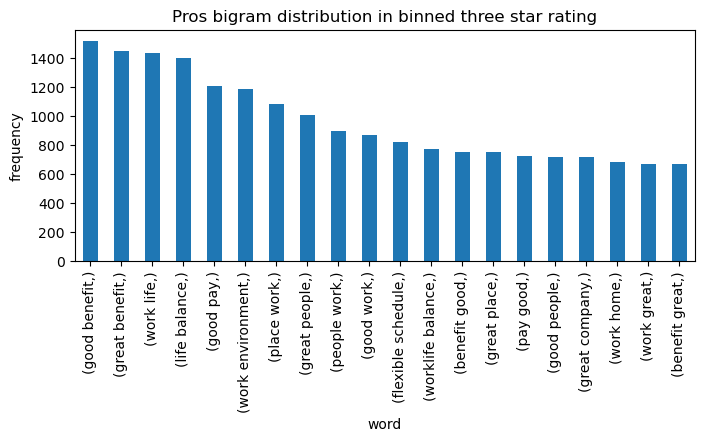

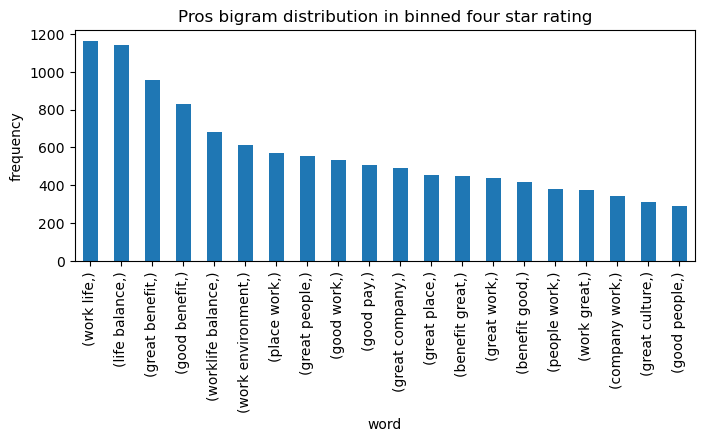

In [6]:
# Define bin edges
bin_edges = [2.9, 3.9, 4.9]

# Define bin labels
bin_labels = ['Three', 'Four']

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    bigram = generate_bigrams(" ".join(bin_data.values))
    bigram_df = pd.DataFrame({'star_bigrams': bigram})
    
    
    # Calculate word counts
    pd.Series(bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Pros bigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

- Top 3 word pairs from pros were work life, life balance, and great benefit

### Cons Distribution by Bin Rating

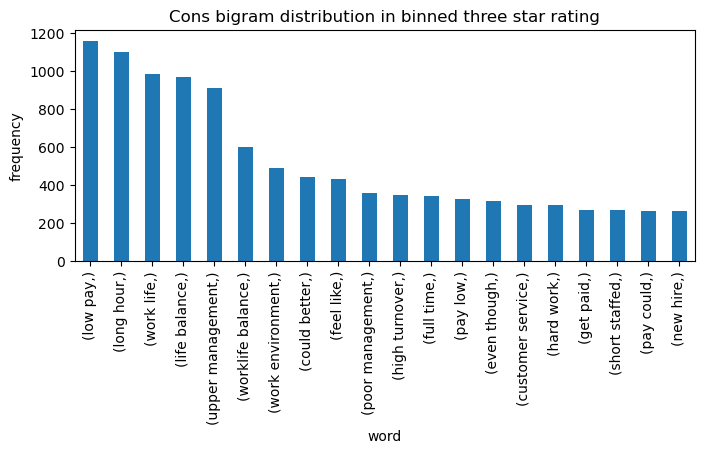

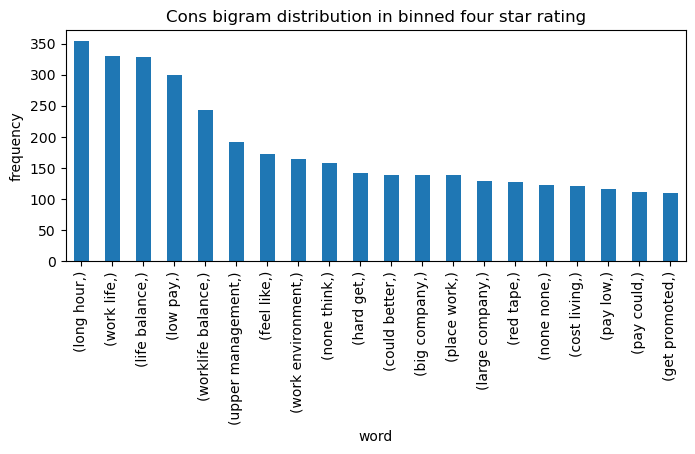

In [7]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    bigram = generate_bigrams(" ".join(bin_data.values))
    bigram_df = pd.DataFrame({'star_bigrams': bigram})
    
    
    # Calculate word counts
    pd.Series(bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Cons bigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

- Top 3 word pairs from cons was long hour, work life, and life balance

**Which words are generally more postive or negative?**

In [8]:
pros_bi_freq = pd.Series(generate_bigrams(" ".join(train.pros_lemmatized.values))).value_counts()
cons_bi_freq = pd.Series(generate_bigrams(" ".join(train.cons_lemmatized.values))).value_counts()
pros_cons_str = " ".join(train.cons_lemmatized.values) + " ".join(train.pros_lemmatized.values)
all_bi_freq = pd.Series(generate_bigrams(pros_cons_str)).value_counts()


In [9]:
bi_word_freq= pd.concat([pros_bi_freq, cons_bi_freq, all_bi_freq], axis=1).fillna(0).astype(int)
bi_word_freq.columns = ['pros_bi_freq', 'cons_bi_freq', 'all_bi_freq']

bi_word_freq.head(5)

,pros_bi_freq,cons_bi_freq,all_bi_freq
work life,2601,1314,3915
life balance,2546,1297,3843
great benefit,2408,41,2449
good benefit,2351,32,2383
work environment,1800,656,2456


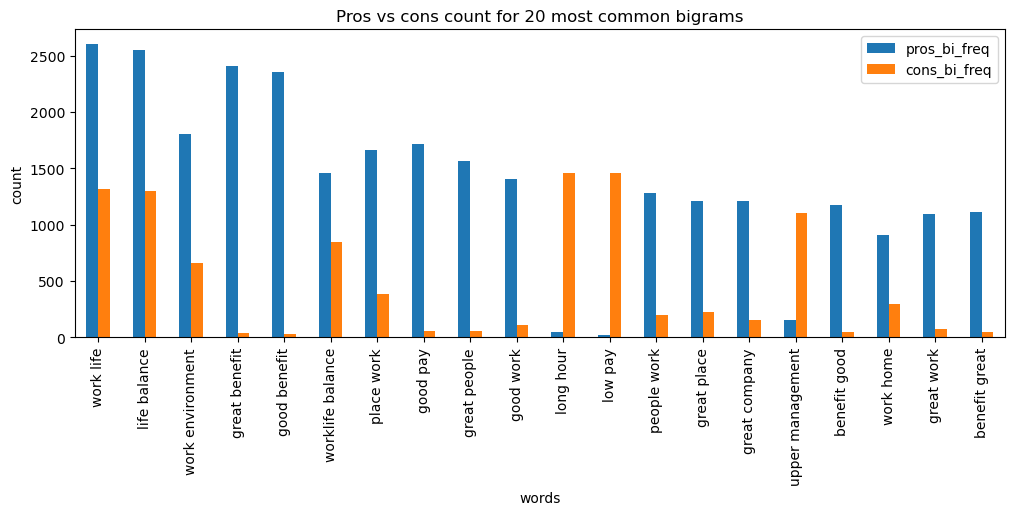

In [10]:
# plot most common words
bi_word_freq.sort_values('all_bi_freq', ascending=False)[['pros_bi_freq', 'cons_bi_freq']].head(20).plot(kind="bar", figsize=(12,4))
plt.title("Pros vs cons count for 20 most common bigrams")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

- Most common bigrams between pros and cons were 'work life', 'life balance' and 'work environment'.

### Observation:
- The word pair 'work life" is extremely impactful for pros and cons.

## Stats analysis

### 1. Do employee reviews (pros and cons) significantly differ in terms of sentiment between 3-star and 4-star rated companies?

- **Null Hypothesis (H0):** Employee reviews' sentiment does not significantly differ between 3-star and 4-star rated companies.
- **Alternate Hypothesis (H1):** Employee reviews' sentiment significantly differs between 3-star and 4-star rated companies.
   
   - Test: Two-sample t-test

In [11]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()
train['pros_lem_sentiment'] = train.pros_lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
train['cons_lem_sentiment'] = train.cons_cleaned.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [12]:
three_star_pros = train.pros_lem_sentiment[train.binned_rating == "Three"].values
three_star_cons = train.cons_lem_sentiment[train.binned_rating == "Three"].values

four_star_pros = train.pros_lem_sentiment[train.binned_rating == "Four"].values
four_star_cons = train.pros_lem_sentiment[train.binned_rating == "Four"].values
four_star_cons[:9]

array([1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9999,
       1.    ])

In [13]:
three_star_pros_dist = stats.norm(three_star_pros.mean(), three_star_pros.std()).rvs(10_000)
three_star_cons_dist = stats.norm(three_star_cons.mean(), three_star_cons.std()).rvs(10_000)

four_star_pros_dist = stats.norm(four_star_pros.mean(), four_star_pros.std()).rvs(10_000)
four_star_cons_dist = stats.norm(four_star_cons.mean(), four_star_cons.std()).rvs(10_000)
four_star_cons_dist

array([1.0000181 , 1.00002995, 0.99995022, ..., 0.99998788, 1.00001656,
       1.00002431])

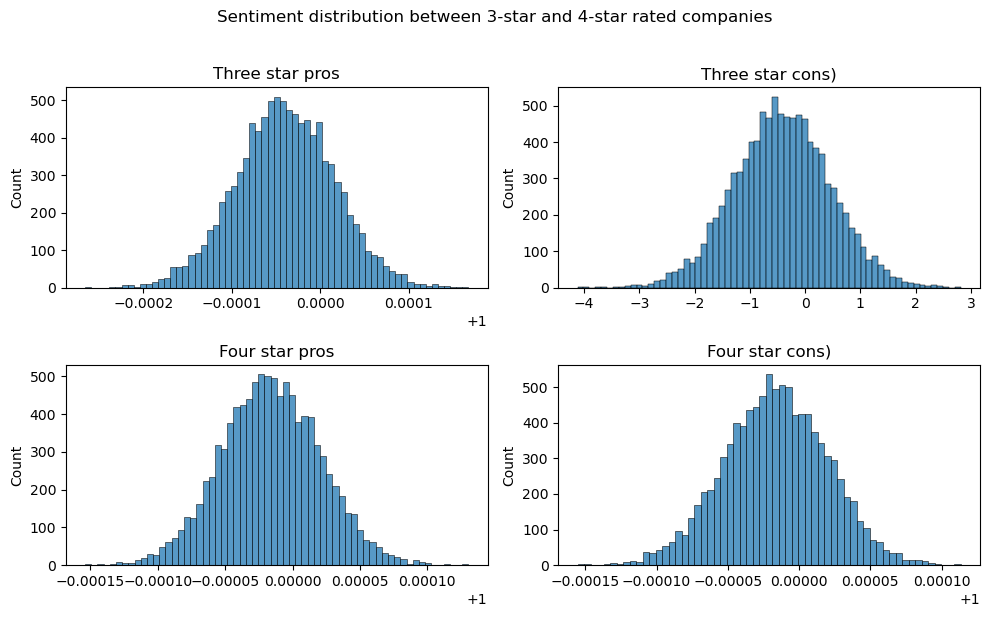

In [14]:
# Create a figure with one row and two columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot the first scatterplot on the first subplot and set title and labels
sns.histplot(three_star_pros_dist, ax=axs[0,0])
axs[0,0].set_title("Three star pros")
# axs[0,0].set_ylabel("Distribution")
# axs[0,0].set_xlabel("Sentiment")

# Plot the second scatterplot on the second subplot and set title and labels
sns.histplot(three_star_cons_dist, ax=axs[0,1])
axs[0,1].set_title("Three star cons)")
# axs[0,1].set_ylabel("Distribution")
# axs[0,1].set_xlabel("Sentiment")

# Plot the first scatterplot on the first subplot and set title and labels
sns.histplot(four_star_pros_dist, ax=axs[1,0])
axs[1,0].set_title("Four star pros")
# axs[1,0].set_ylabel("Distribution")
# axs[1,0].set_xlabel("Sentiment")

# Plot the second scatterplot on the second subplot and set title and labels
sns.histplot(four_star_cons_dist, ax=axs[1,1])
axs[1,1].set_title("Four star cons)")
# axs[1,1].set_ylabel("Distribution")
# axs[1,1].set_xlabel("Sentiment")

# Add a main title for the entire figure
plt.suptitle("Sentiment distribution between 3-star and 4-star rated companies", y=1.02)

# Show the plots
plt.tight_layout()
plt.show()

**Three and four star pros**

In [15]:
def hypothesis_check(p_value, alpha = 0.05):
    if p_value < alpha:
        print("Reject null")
    else:
        print("Fail to reject null hypothesis. No statistical significance.")

In [16]:
def hypothesis_check_double_side_ttest(p_value, t_stats, alpha= 0.05):
    if (t_stats > 0) and (p_value//2 < alpha):
        print("Reject the null")
    else:
        print("Fail to reject null hypothesis. No statistical significance.")

In [17]:
statistic, p_value = stats.ttest_ind(three_star_pros.mean(),four_star_pros.mean())
hypothesis_check_double_side_ttest(p_value, statistic)

Fail to reject null hypothesis. No statistical significance.


**Three and four star cons**

In [18]:
statistic, p_value = stats.ttest_ind(three_star_cons.mean(),four_star_cons.mean())
hypothesis_check_double_side_ttest(p_value, statistic)

Fail to reject null hypothesis. No statistical significance.


***Do 4-star companies have higher CEO approvals than 3-star companies?***

Plot Distibutions

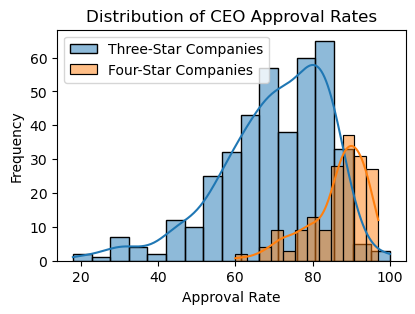

In [19]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(train[train['binned_rating_int']==3]['ceo_approval'],
             kde=True, alpha=0.5, label="Three-Star Companies")

# Plot histogram for Sample 2
sns.histplot(train[train['binned_rating_int']==4]['ceo_approval'],
             kde=True, alpha=0.5, label="Four-Star Companies")

# Add labels and title to the plot
plt.xlabel('Approval Rate')
plt.ylabel('Frequency')
plt.title('Distribution of CEO Approval Rates')

# Add legend
plt.legend()

Verify Assumptions

- Independence: We will assume the companies are independent
- Normality: We can assume normality. The samples are large 

In [ ]:
train['binned_rating_int'].value_counts()[:2]

Verify Equal Variances

In [ ]:
print(f"CEO Approval Variance for Three-Star Companies: {train[train['binned_rating_int']==3]['ceo_approval'].var()}")
print(f"CEO Approval Variance for Four-Star Companies: {train[train['binned_rating_int']==4]['ceo_approval'].var()}")

# Levene test
stat, p_levene = stats.levene(train[train['binned_rating_int']==3]['ceo_approval'],
                              train[train['binned_rating_int']==4]['ceo_approval'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

Compute t-stat and p-value

In [ ]:
stats.ttest_ind(train[train['binned_rating_int']==3]['ceo_approval'], 
                train[train['binned_rating_int']==4]['ceo_approval'],
                equal_var=False)

There is a significant difference in CEO approvals between Three-star and Four-star companies.

In [ ]:
train.groupby('binned_rating')['ceo_approval'].mean()[1:].reset_index()b

In [ ]:
# Assuming you have filtered your data as follows:
ceo_approval_3 = train[train['binned_rating_int'] == 3]['ceo_approval']
ceo_approval_4 = train[train['binned_rating_int'] == 4]['ceo_approval']

# Calculate the means for both sets of CEO approvals
mean_approval_3 = ceo_approval_3.mean()
mean_approval_4 = ceo_approval_4.mean()

# Create a DataFrame for plotting
data = pd.DataFrame({'Binned Rating': ['Three-Star Companies', 'Four-Star Companies'],
                     'Mean CEO Approval': [mean_approval_3, mean_approval_4]})

# Set up the plot
sns.set(style="white", rc={"axes.edgecolor": "#e4e4e4"})
plt.figure(figsize=(8, 6))
# Create the barplot
sns.barplot(x='Binned Rating', y='Mean CEO Approval',
            data=data, color='#e4e4e4', edgecolor='#e4e4e4')

# Add labels and a title
plt.xlabel('')
plt.xticks(fontsize=15)
plt.ylabel('Average\nCEO Approval', rotation=0,
           labelpad=25, color='#e4e4e4', fontsize=15)
plt.yticks(range(0, 101, 20),
           labels=[f'{x}%' for x in range(0, 101, 20)],
           fontsize=12)

# Annotate the bars with their values
for index, row in data.iterrows():
    plt.annotate(f'{row["Mean CEO Approval"]:.0f}%', 
                 xy=(index, row["Mean CEO Approval"]), 
                 ha='center', va='bottom',
                 color='#e4e4e4',
                 fontsize=22)

fig = plt.gcf()
fig.set_facecolor('#0a7b30')
ax = plt.gca()
ax.set_facecolor('#0a7b30')

ax.tick_params(axis='both', color='#e4e4e4', labelcolor='#e4e4e4')

sns.despine()

***Are 4-star companies more likely to be recommended than 3-star companies?***

Plot Distibutions

In [ ]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(train[train['binned_rating_int']==3]['recommended'],
             kde=True, alpha=0.5, label="Three-Star Companies")

# Plot histogram for Sample 2
sns.histplot(train[train['binned_rating_int']==4]['recommended'],
             kde=True, alpha=0.5, label="Four-Star Companies")

# Add labels and title to the plot
plt.xlabel('Recommendation Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Recommmendation Rates')

# Add legend
plt.legend()

Verify Assumptions

- Independence: We will assume the companies are independent
- Normality: We can assume normality. The samples are large 

In [ ]:
train['binned_rating_int'].value_counts()[:2]

Verify Equal Variances

In [ ]:
print(f"CEO Approval Variance for Three-Star Companies: {train[train['binned_rating_int']==3]['recommended'].var()}")
print(f"CEO Approval Variance for Four-Star Companies: {train[train['binned_rating_int']==4]['recommended'].var()}")

# Levene test
stat, p_levene = stats.levene(train[train['binned_rating_int']==3]['recommended'],
                              train[train['binned_rating_int']==4]['recommended'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

Compute t-stat and p-value

In [ ]:
stats.ttest_ind(train[train['binned_rating_int']==3]['recommended'], 
                train[train['binned_rating_int']==4]['recommended'],
                equal_var=False)

There is a significant difference in CEO approvals between Three-star and Four-star companies.

In [ ]:
train.groupby('binned_rating')['recommended'].mean()[1:].reset_indbex()

In [ ]:
# Assuming you have filtered your data as follows:
ceo_approval_3 = train[train['binned_rating_int'] == 3]['recommended']
ceo_approval_4 = train[train['binned_rating_int'] == 4]['recommended']

# Calculate the means for both sets of CEO approvals
mean_approval_3 = ceo_approval_3.mean()
mean_approval_4 = ceo_approval_4.mean()

# Create a DataFrame for plotting
data = pd.DataFrame({'Binned Rating': ['Three-Star Companies', 'Four-Star Companies'],
                     'Mean Referral Percentage': [mean_approval_3, mean_approval_4]})

# Set up the plot
sns.set(style="white", rc={"axes.edgecolor": "#e4e4e4"})
plt.figure(figsize=(8, 6))
# Create the barplot
sns.barplot(x='Binned Rating', y='Mean Referral Percentage',
            data=data, color='#e4e4e4')

# Add labels and a title
plt.xlabel('')
plt.xticks(fontsize=15)
ylabel = plt.ylabel('Average\nRecommendation (%)', rotation=0,
           labelpad=50, color='#e4e4e4', fontsize=15)

ylabel.set_y(ylabel.get_position()[1] - 0.05)
plt.yticks(range(0, 101, 20),
           labels=[f'{x}%' for x in range(0, 101, 20)],
           fontsize=12)

# Annotate the bars with their values
for index, row in data.iterrows():
    plt.annotate(f'{row["Mean Referral Percentage"]:.0f}%', 
                 xy=(index, row["Mean Referral Percentage"]), 
                 ha='center', va='bottom',
                 color='#e4e4e4',
                 fontsize=22)

fig = plt.gcf()
fig.set_facecolor('#0a7b30')
ax = plt.gca()
ax.set_facecolor('#0a7b30')

ax.tick_params(axis='both', color='#e4e4e4', labelcolor='#e4e4e4')

sns.despine()

# Modeling

## Count Vect Modeling for Pros and Cons UNIGRAMS

### Baseline

In [20]:
train, val, test = bi_count_vect

In [21]:
most_common = train["binned_rating_int"].value_counts().idxmax()
most_common_frequency = train["binned_rating_int"].value_counts().max()

baseline_accuracy = most_common_frequency / len(train)

print(f"Most Common Class: {most_common}")
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")



Most Common Class: 3
Baseline Accuracy: 0.70


## Decision Tree

In [22]:
X_train = train[['pros_work life', 'pros_life balance', 'pros_work environment', 'pros_good benefit', 'pros_worklife balance', 'cons_work life', 'cons_life balance', 'cons_work environment', 'cons_good benefit', 'cons_worklife balance']]
y_train = train["binned_rating_int"]

X_val = val[['pros_work life', 'pros_life balance', 'pros_work environment', 'pros_good benefit', 'pros_worklife balance', 'cons_work life', 'cons_life balance', 'cons_work environment', 'cons_good benefit', 'cons_worklife balance']]
y_val = val["binned_rating_int"]

X_test = test[['pros_work life', 'pros_life balance', 'pros_work environment', 'pros_good benefit', 'pros_worklife balance', 'cons_work life', 'cons_life balance', 'cons_work environment', 'cons_good benefit', 'cons_worklife balance']]
y_test = test["binned_rating_int"]


In [23]:
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
}

# Create the Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV with the Decision Tree classifier and hyperparameter grid
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search_tree.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params_tree = grid_search_tree.best_params_

# Get the best estimator (model) from the search
best_tree = grid_search_tree.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred_tree = best_tree.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy_tree = accuracy_score(y_val, y_val_pred_tree)

# Make predictions on the training set using the best Decision Tree model
y_train_pred_tree = best_tree.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

print("Decision Tree:")
print(f"Best Hyperparameters: {best_params_tree}")
print(f"Validation Accuracy: {val_accuracy_tree:.2f}")
print(f"Training Accuracy: {train_accuracy_tree:.2f}")


Decision Tree:
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5}
Validation Accuracy: 0.56
Training Accuracy: 0.89


In [24]:
feature_importance = best_tree.feature_importances_
feature_importance

feature_names = X_train.columns

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print feature importances
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: pros_work life, Importance: 0.1002
Feature: pros_life balance, Importance: 0.0742
Feature: pros_work environment, Importance: 0.1952
Feature: pros_good benefit, Importance: 0.1711
Feature: pros_worklife balance, Importance: 0.1870
Feature: cons_work life, Importance: 0.0360
Feature: cons_life balance, Importance: 0.0532
Feature: cons_work environment, Importance: 0.0733
Feature: cons_good benefit, Importance: 0.0379
Feature: cons_worklife balance, Importance: 0.0717


# RandomForrest

In [25]:
# Define hyperparameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV with the Random Forest classifier and hyperparameter grid
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params_rf = grid_search_rf.best_params_

# Get the best estimator (model) from the search
best_rf = grid_search_rf.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred_rf = best_rf.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

# Make predictions on the training set using the best Random Forest model
y_train_pred_rf = best_rf.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

print("Random Forest:")
print(f"Best Hyperparameters: {best_params_rf}")
print(f"Validation Accuracy: {val_accuracy_rf:.2f}")
print(f"Training Accuracy: {train_accuracy_rf:.2f}")



Random Forest:
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Validation Accuracy: 0.64
Training Accuracy: 0.93


In [26]:
feature_importance = best_rf.feature_importances_
feature_importance

feature_names = X_train.columns

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print feature importances
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: pros_work life, Importance: 0.1378
Feature: pros_life balance, Importance: 0.1298
Feature: pros_work environment, Importance: 0.1263
Feature: pros_good benefit, Importance: 0.1162
Feature: pros_worklife balance, Importance: 0.1649
Feature: cons_work life, Importance: 0.0691
Feature: cons_life balance, Importance: 0.0676
Feature: cons_work environment, Importance: 0.0845
Feature: cons_good benefit, Importance: 0.0225
Feature: cons_worklife balance, Importance: 0.0812


# KNN

In [27]:
# Define hyperparameter grid to search for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV with the KNN classifier and hyperparameter grid
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params_knn = grid_search_knn.best_params_

# Get the best estimator (model) from the search
best_knn = grid_search_knn.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred_knn = best_knn.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)

# Make predictions on the training set using the best KNN model
y_train_pred_knn = best_knn.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)

print("K-Nearest Neighbors:")
print(f"Best Hyperparameters: {best_params_knn}")
print(f"Validation Accuracy: {val_accuracy_knn:.2f}")
print(f"Training Accuracy: {train_accuracy_knn:.2f}")


K-Nearest Neighbors:
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Validation Accuracy: 0.66
Training Accuracy: 1.00


# Logistic Regression

In [28]:
# Define hyperparameter grid to search for Logistic Regression
param_grid_logreg ={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Solver options
}

# Create the Logistic Regression classifier
logreg = LogisticRegression(random_state=42)

# Create GridSearchCV with the Logistic Regression classifier and hyperparameter grid
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search_logreg.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params_logreg = grid_search_logreg.best_params_

# Get the best estimator (model) from the search
best_logreg = grid_search_logreg.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred_logreg = best_logreg.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)

# Make predictions on the training set using the best Logistic Regression model
y_train_pred_logreg = best_logreg.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)

print("Logistic Regression:")
print(f"Best Hyperparameters: {best_params_logreg}")
print(f"Validation Accuracy: {val_accuracy_logreg:.2f}")
print(f"Training Accuracy: {train_accuracy_logreg:.2f}")


Logistic Regression:
Best Hyperparameters: {'C': 0.01, 'solver': 'saga'}
Validation Accuracy: 0.69
Training Accuracy: 0.73


In [29]:
log_coeffs

NameError: name 'log_coeffs' is not defined

In [ ]:
log_coeffs = pd.DataFrame(best_logreg.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

Odds Interpretation:

For every one unit increase in the 2-word phrase, we expect `coeffs` times increase in odds of being a 4-star company rather than a 3-star company

# Naive Bayes

In [ ]:
# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model with the training data
gnb.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_gnb = gnb.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy_gnb = accuracy_score(y_val, y_val_pred_gnb)

# Make predictions on the training set
y_train_pred_gnb = gnb.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)

print("Naive Bayes (Gaussian):")
print(f"Validation Accuracy: {val_accuracy_gnb:.2f}")
print(f"Training Accuracy: {train_accuracy_gnb:.2f}")


# XG BOOST

In [ ]:
# Map class labels to 0 and 1
y_train = y_train.map({3: 0, 4: 1})
y_val = y_val.map({3: 0, 4: 1})

# Define hyperparameter grid to search for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300]
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create GridSearchCV with the XGBoost classifier and hyperparameter grid
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params_xgb = grid_search_xgb.best_params_

# Get the best estimator (model) from the search
best_xgb = grid_search_xgb.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred_xgb = best_xgb.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)

# Make predictions on the training set using the best XGBoost model
y_train_pred_xgb = best_xgb.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)

print("XGBoost:")
print(f"Best Hyperparameters: {best_params_xgb}")
print(f"Validation Accuracy: {val_accuracy_xgb:.2f}")
print(f"Training Accuracy: {train_accuracy_xgb:.2f}")


In [ ]:
feature_importance = best_xgb.feature_importances_
feature_importance

feature_names = X_train.columns

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print feature importances
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance:.4f}")

## Test

In [ ]:
X_train = train[['pros_work life', 'pros_life balance', 'pros_work environment', 'pros_good benefit', 'pros_worklife balance', 'cons_work life', 'cons_life balance', 'cons_work environment', 'cons_good benefit', 'cons_worklife balance']]
y_train = train["binned_rating_int"]

X_val = val[['pros_work life', 'pros_life balance', 'pros_work environment', 'pros_good benefit', 'pros_worklife balance', 'cons_work life', 'cons_life balance', 'cons_work environment', 'cons_good benefit', 'cons_worklife balance']]
y_val = val["binned_rating_int"]

X_test = test[['pros_work life', 'pros_life balance', 'pros_work environment', 'pros_good benefit', 'pros_worklife balance', 'cons_work life', 'cons_life balance', 'cons_work environment', 'cons_good benefit', 'cons_worklife balance']]
y_test = test["binned_rating_int"]


logreg = LogisticRegression(C=0.01,solver="saga",random_state=42)

y_test_pred_logreg = best_logreg.predict(X_test)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)

print("Logistic Regression:")
print(f"Testing Accuracy: {test_accuracy_logreg:.2f}")

## Observation:
- The logistic regression model performs at 70% accuracy on test data, which ties with baseline.

# Conclusion
Our analysis of Glassdoor employee reviews identified work-life balance as the primary key factor for employee satisfaction. The Logistic Regression model performed well on the test dataset, achieving a 70% accuracy score, consistent with our baseline predictions.

# Recommendations
 **improve the model and further explore:** As it increases performance and therefore gives predictive insight, we recommend using logistic regression model over the baseine model for this use case as its performance is tied and can be further enhaned.


# Next steps
1. **NON-DRIVERS**: Identify what doesnt drive company ratings.

2. **GATHER DATA**: Further explore data using other methods and gather data from outside sources besides glassdoor.

3. **RATINGS**: Treat ratings as numbers to run numerical test.

4. **ISOLATE**: Seperate factors such as industry and company size.
